# Viewing a matrix as a function

### What's a function?

- Roughly, we can think of a function as a black box that takes inputs and produces outputs
- Functions can be applied to any input-ouput relationship 
    1. The equation $y = mx + b$ where the input is $x \in \mathbb{R}$ and the output is $y \in \mathbb{R}$
    2. An FM radio: the input to the radio is a specific frequency and the output is the radio station at that frequency
    3. Deciding to increase/decrease taxes to improve the economy. The input is passing legislation to increase/decreases taxes and the outputs are unemployment rate, GDP growth, etc.     
    4. Pulling the lever in a slot machine. The input is pulling the lever, the outputis the set of symbols the slot machine produces



<img src="https://github.com/hemanthb123/applied-math-for-ML/blob/master/imgs/lecture-1/black.png?raw=1" alt="Drawing" style="width: 500px;"/>

- Comments about the example functions
    1. The linear equation produces a unique output for each unique input. Is there an edge-case where this fails?
    2. The FM radio will always give us the same radio station for a given input frequency (for example, 88.3 kHz). But the actual content of the output changes over time (the radio will play different songs during the day).
    3. This example has a single input but many outputs. Furthermore, while increasing/descreaing taxes may have an impact on the economy, there are many other factors that also influence growth metrics. 
    4. This is an example where the output is completely indepenent of the input. 

# The matrix as a linear machine

- In this lecture we will view the matrix as describing a very special type of function:
    - $f(x) = Ax$ 
    - where 
        - $A \in \mathbb{R}^{m\times n}$, 
        - $x \in \mathbb{R}^{n}$
        - $y \in \mathbb{R}^{m}$ 
        
- In other words, we are going to think about $A \in \mathbb{R}^{m\times n}$ as a function or a "machine" that transforms an array of $n$ numbers $x \in \mathbb{R}^{n}$ to another array of $m$ numbers $y \in \mathbb{R}^{m}$ 


- We will represent $n$ numbers $x \in \mathbb{R}^{n}$ as a column vector (unless otherwise noted):

$x = \begin{bmatrix} x_{1}\\  x_{2}\\  \vdots \\  x_{n} \end{bmatrix}$

- Similarly we will denote the matrix $A \in \mathbb{R}^{m\times n}$ as:

$A = \begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n}\\ 
a_{2,1} & a_{2,2} &  \cdots & \vdots\\ 
\vdots &  &  \ddots & \vdots\\ 
a_{m,1} &  a_{m,2}& \cdots & a_{m,n}
\end{bmatrix}$

# Matrix-vector multiplication: "formal" definition

For matrix $A \in \mathbb{R}^{m\times n}$ and a vector $x \in \mathbb{R}^{n}$

$A = \begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n}\\ 
a_{2,1} & a_{2,2} &  \cdots & \vdots\\ 
\vdots &  &  \ddots & \vdots\\ 
a_{m,1} &  a_{m,2}& \cdots & a_{m,n}
\end{bmatrix}$ , $x = \begin{bmatrix} x_{1}\\  x_{2}\\  \vdots \\  x_{n} \end{bmatrix}$


### $Ax = \sum_{i}^{n}\sum_{j}^{m}a_{j,i}x_{i}$

Easy to see we have $O(mn)$ multiplications.

# Matrix-vector multiplication viewed as a linear combination of $n$ columns
For matrix $A \in \mathbb{R}^{m\times n}$ and a vector $x \in \mathbb{R}^{n}$

$A = \begin{bmatrix}
a_{1} & a_{2} & \cdots & a_{n}
\end{bmatrix}$ , where $a_{i} \in \mathbb{R}^{m\times1}$



### $y = Ax = \sum_{i}^{n}a_{i}x_{i}$

In this view we can think of matrix multiplication as trying to explain $y$ with a the column vectors of $A$. Each element of $x$ tells us how much of each column of $A$ to mix to get a desired $y$. In this view we are trying to find an $x$ that can be used to express $y$ with the columns of $A$. 

For example, each column can correspond to a different piano note (so on a full keyboard we would have 88 columns). Each element in $x$ in this case would correspond to selecting which notes to play on the keyboard and at what volume to get a desired chord or overall sound.

<img src=""./imgs/lecture-1/g_chord.png" alt="Drawing" style="width: 200px;"/ align = left>



# Matrix-vector multiplication viewed as a projections onto $m$ rows
For matrix $A \in \mathbb{R}^{m\times n}$ and a vector $x \in \mathbb{R}^{n}$

$A = \begin{bmatrix}
a_{1}^{T}\\ 
a_{2}^{T}\\ 
\vdots \\ 
a_{m}^{T}
\end{bmatrix}$ where $a_{i}^{T} \in \mathbb{R}^{1\times n}$


### $Ax = \begin{bmatrix}
a_{1}^{T}x\\ 
a_{2}^{T}x\\ 
\vdots \\ 
a_{m}^{T}x
\end{bmatrix}$


In this view we can think of matrix multiplication as "untagling" $x$ into the components of the rows of $A$. The inner product (also known as dot product) operation $a_{i}^{T}x$ tells us how much does $x$ match up with $a_{i}$. The "larger" $a_{i}x$ is, the more $x$ is "expressed" by $a_{i}$.


# Key question about matrices as linear transformations we address in this lecture

- What happens when:
    - $m < n$? 
    - $m > n$?
    - $m = n$?

## Simple base case $m = n = 1$

### $y = ax$ 

- $y , a, x \in \mathbb{R}$
- In this case, the input and the output is the real number line. 
- We can think of this linear function as stretching or shrinking the real number line.
- In this special case, $a$ is also called the slope.

### Example: converting inches to centimeters
- $y = \frac{1}{2.54}x$ 
    - x is in inches and y is in centimeters. This function "shrinks" the measurements by a factor of 2.54
    
Even though this is elementary, lets illustrate it computationally to both get some intuition and get familiar with the libraries we will be using:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML

%matplotlib inline

In [23]:
N = 100                  # Number of measurements
x = np.random.randn(N)   # a bunch of measurements in inches
y = x/2.54               # the linear machine to transfrom from inches to centimeters
x.shape

(100,)

Text(0.5,0,'Measurements made in inches')

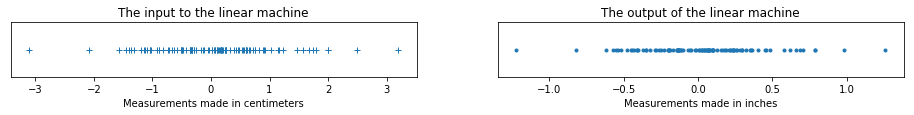

In [11]:
plt.figure(figsize=(16, 1))

plt.subplot(1,2,1)
plt.plot(x, np.zeros_like(x), '+')
plt.title("The input to the linear machine")
plt.xlabel("Measurements made in centimeters")
plt.yticks([])
plt.subplot(1,2,2)
plt.plot(y, np.zeros_like(y), '.')
plt.yticks([])
plt.title("The output of the linear machine")
plt.xlabel("Measurements made in inches")


- So the input to this machine (on the left) is just samples from the real number line and the output is also just samples from the real number line. However, as indicated by the scale of the horizontal axis, notice that the output is a *shurnk* version of the input data.
- Notice in this example for every input we have a unique output. We can also find for every output what the corresponding input is. In this case we say that the linear function is **one-to-one** or **1-to-1**.
- Is this true for every $m=n$ linear function?
    - No, not true if $a = 0$, then $y = 0$ for all $x \in \mathbb{R}$
    
- Put another way, for $a \neq 0$, we have lost no "information" but for $a = 0$ we lose information.

## Special case: m > n = 1

### $\begin{bmatrix}y_{1} \\ \vdots \\y_{m} \end{bmatrix} = \begin{bmatrix}a_{1}  \\ \vdots \\ a_{m} \end{bmatrix}x$

for $x \in \mathbb{R}$. In this case the input is a single number (called a **scalar**) that we can think of as just being 1-D. The output is now *multi-dimensional* since we are consider the case $m > 1$. In other words, the input is just 1 number whereas the output is an array of $m$ numbers. We can also write this as

### $\begin{bmatrix}y_{1} \\ \vdots \\y_{m} \end{bmatrix} = \begin{bmatrix}a_{1}x  \\ \vdots \\ a_{m}x \end{bmatrix}$

You might be tempted to think that with this linear machine we have somehow went from a "1-dimensional" input to an "m-dimensional" output. **However**, as we will soon see, even though the output consists of $m$ numbers, the inherit dimension of the output is still just 1.

### m = 2
Lets try to get some intuition behind linear machines of this type by considering the case where $m = 2$. In this case we have

$\begin{bmatrix}y_{1} \\y_{2} \end{bmatrix} = \begin{bmatrix}a_{1} \\a_{2} \end{bmatrix}x$

To keep the notation a little less cluttered, lets use $a = a_{1}$ and $b = a_{2}$. In this case, we can write

$\left\{\begin{matrix}
y_{1} = ax \\
y_{2} = bx
\end{matrix}\right.$

For now, let's assume that $a \neq 0$ and $b \neq 0$. Then, solving for $x$, we find that

### $y_{2} = \frac{b}{a}y_{1}$

In other words, $y_{2}$ and $y_{1}$ are linearly dependent on each other! Knowing $y_{1}$ will tell us what $y_{2}$ is. So our linear machine is not taking 1-dimensional number as input and creating 2 sets of totally different numbers. These 2 numbers are related to each other and are not free to be anything they want. 


Another way to think about this isthat this linear machine does not "cover" all the points in $y_{1}, y_{2}$. It's only able to map to points that are restricted to the constraint $y_{2} = \frac{b}{a}y_{1}$. 

Lets illustrate with a concrete example

### Example: converting from centimeters to inches *and* feet

$\qquad\begin{bmatrix}y_{1} \\y_{2} \end{bmatrix} = \begin{bmatrix}a_{1} \\a_{2} \end{bmatrix}x$

- x is in inches and y is in centimeters. This function "shrinks" the measurements by a factor of 2.54
    
Even though this is super basic, lets illustrate it computationally to both get some intuition and get familiar with the libraries we will be using:



In [27]:
N = 100                  # Number of measurements
x = np.random.randn(N)   # a bunch of measurements in inches
A = np.matrix([2.4, 12*2.14]).T
#y = (np.dot(A,x.reshape((1,100)))).T
y=(A*x).T

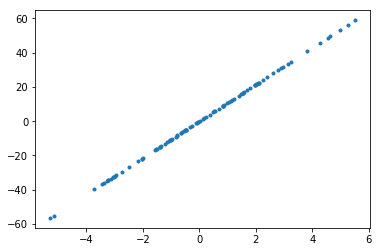

In [28]:
plt.plot(y[:,0], y[:,1], '.')

## Exercise m = 1, n = 2

$\qquad y = \begin{bmatrix}a_{1} & a_{2} \end{bmatrix}x$


(2, 100)
(1, 2)
(1, 100)


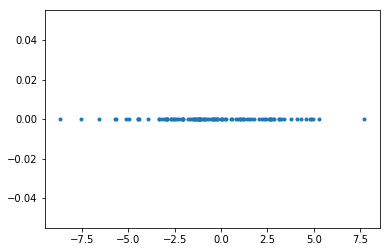

In [48]:
N = 100
x = np.random.randn(2,N)
print(x.shape)
A = np.matrix([[1,3]])
print(A.shape)
y= np.dot(A,x)
print(y.shape)
plt.plot(y.T,np.zeros_like(y.T),'.')
#plt.plot(A,np.zeros_like(A),'.')

## Special case: m = n = 2

For this case, both the input and output are 2D vectors:

$\begin{bmatrix} y_{1}\\  y_{2} \end{bmatrix} = \begin{bmatrix}
a & b \\ c & d  \end{bmatrix} \begin{bmatrix} x_{1}\\  x_{2} \end{bmatrix}$

Solving for $x_{2}$ (and assuming $b \neq 0$), we can write:

$y_{2} = \frac{d}{b}y_{1} + x_{1}(c - \frac{ad}{b})$

Notice that in this case if we have $c - \frac{ad}{b} = 0$, then $y_{2} = \frac{d}{b}y_{1}$. In this case we have a situation very similar to the case $m = 2, n = 1$. That is, even though the output is 2D, $y_{1}$ and $y_{2}$ are dependent on each other.

## Not random input example

In [74]:
A = np.array([[10,2], 
              [10,10]])

N = 100                  # Number of measurements
#x = np.random.randn(N,2)   # a bunch of measurements in inches
x1 = np.vstack(( 0*np.ones(N).T+np.random.randn(N).T, np.random.randn(N).T))
y1 = np.dot(A.T, x1).T
x2 = np.vstack((0*2*np.ones(N)+np.random.randn(N).T, np.random.randn(N).T))
y2 = np.dot(A.T, x2).T

In [75]:
print(x1.shape)
x1[:,:3]

(2, 100)


array([[ 0.11849907, -0.22325451,  0.15519183],
       [ 0.30821788, -0.09109292,  0.02086407]])

In [76]:
x2[:,:3]

array([[ 0.47647366,  0.10169428,  0.36888325],
       [ 1.71778149,  0.15800512, -2.04429418]])

Text(0.5,0,'$y_{2}$')

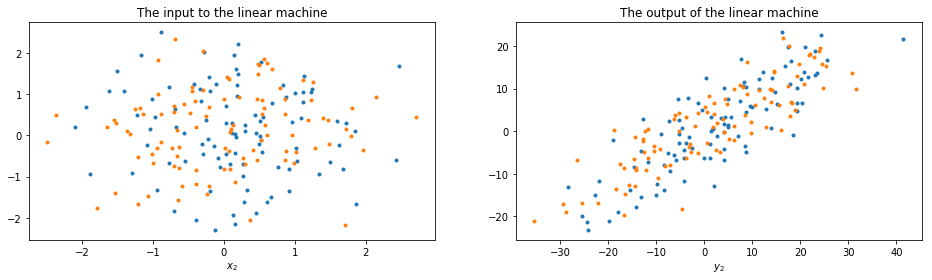

In [77]:


plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(x1[0,:], x1[1,:], '.')
plt.plot(x2[0,:], x2[1,:], '.')
plt.title("The input to the linear machine")
plt.xlabel("$x_{1}$")
plt.xlabel("$x_{2}$")


plt.subplot(1,2,2)
plt.plot(y1[:,0], y1[:,1], '.')
plt.plot(y2[:,0], y2[:,1], '.')
plt.title("The output of the linear machine")
plt.xlabel("$y_{1}$")
plt.xlabel("$y_{2}$")

To formalize and better understand what happens in the case $m,n > 2$ we need a vocaubulary and set of definitions to be able to desecribe what happens in high dimensional spaces. 
- sets
- vector spaces, subspaces
- linear independent set of vectors
- basis set
- norms and inner products
 

## Sets 

**Defintion of Set $S$:** a collection of items that we refer to as the set $S$    
  - **Important**: We assume that set also includes the emtpy set 
  
**Examples:**
 - $S_{1} = \mathbb{R}$ (read as: the set of all real numbbers)
 - $S_{2} = \{x | x \in \mathbb{R}, x > 0$\} (read as: the set of reals that are positive)
 - $S_{3} = \{(x_{1}, \ldots, x_{n}) | x_{1}, \ldots, x_{n} \in \mathbb{R}, \Sigma_{i=1}^{n}x_{i}^{2}< 1$\}
 - $S_{4}$ = \{Heads, Tails\} (read as: the set of either heads or tails
 
Notice that each of these sets can have different properties. In what follows, we try to narrow the range of sets to be of a very specific type: the vector space.
 

## Vector space



**Defintion relevant for matrices and linear algebra:**


A vector space over $\mathbb{R}^{n}$ is a set $V$ together with two operations that satisfy the eight axioms listed below.


- **Addition** $+ : V \times V \rightarrow V$, takes any two vectors $v, w$ and assigns them to a third vector which is commonly written as $z = v + w$ with $z \in V$ 

- **Scalar multiplication:** $\cdot : \mathbb{R} \times V \rightarrow V$, takes any scalar $c \in \mathbb{R}$ and any vector $v \in V$ and gives another vector $cv \in V$



To qualify as a vector space, the set $V$ and the operations of addition and multiplication must adhere to a number of requirements called axioms. In the list below, let $\mathbf{u}$, $\mathbf{v}$ and $\mathbf{w}$ be arbitrary vectors in $V$, and $a$ and $b$ scalars in $\mathbb{R}$:



- **Associativity of addition**: $\mathbf{u + (v + w) = (u + v) + w}$
- **Commutativity of addition**: $\mathbf{u + v = v + u}$
- **Identity element of addition**: There exists an element $\mathbf{0} \in V$, such that $\mathbf{v + 0 = v}$ for all $\mathbf{v} \in V$
- **Inverse elements of addition**: For every $\mathbf{v} \in V$, there exists an element $-\mathbf{v} \in V$, called the *additive inverse* of $\mathbf{v}$, such that $\mathbf{v + \left(-v\right) = 0}$
- **Compatibility of scalar multiplication with field multiplication** $a\left(b\mathbf{v}\right) = \left(ab\right)\mathbf{v}$
- **Identity element of scalar multiplication**: $\mathbf{Iv = v}$, where $\mathbf{I}$ denotes the multiplicative identity in $F$.
- **Distributivity of scalar multiplication with respect to vector addition**: $a\left(\mathbf{u + v}\right) = a\mathbf{u} + a\mathbf{v}$
- **Distributivity of scalar multiplication with respect to scalar addition**: $\left(a + b\right)\mathbf{v} = a\mathbf{v} + b\mathbf{v}$




## Examples of failed vector spaces
 
**Example 1:** a convex subgraph  

In [ ]:
display(HTML('''<img src="./imgs/lecture-1/convex_subgraph.png" alt="Drawing" style="width: 200px;"/, align = "left">  '''))

**Example 2:** a unit disk  


<img src="./imgs/lecture-1/unit_disc.png" alt="Drawing" style="width: 200px;"/, align = "left">

In [ ]:
display(HTML('''<img src="./imgs/lecture-1/unit_disc.png" alt="Drawing" style="width: 200px;"/, align = "left">'''))

## Examples of actual vector spaces

- $\mathbb{R}$
- $\mathbb{R}^{n}$
- $\mathbb{R}^{m\times n}$

# Subspace
Let $V$ be a vector space over $\mathbb{R}^{n}$, and let $W$ be a subset of $V$. Then $W$ is a **subspace** if:

 - The zero vector $\mathbf{0}$, is in $W$.
 - If $\mathbf{u}$ and $\mathbf{v}$ are elements of $W$, then the sum $\mathbf{u} + \mathbf{v}$ is an element of $W$.
 - If $\mathbf{u}$ is an element of $W$ and $c \in \mathbb{R}$, then the scalar product $c\mathbf{u}$ is an element of $W$.

## Examples of legitimate subspaces:

- hyperplanes crossing the origin 

In [ ]:
display(HTML('''<img src="./imgs/lecture-1/line_origin.png" alt="Drawing" style="width: 200px;"/, align = "left">'''))

## Examples of failed subspaces:

In [ ]:
display(HTML('''<img src="./imgs/lecture-1/line_intercept.png" alt="Drawing" style="width: 200px;"/, align = "left">'''))

In [ ]:
display(HTML('''<img src="./imgs/lecture-1/quad.png" alt="Drawing" style="width: 200px;"/, align = "left">'''))

## Example subspace: Range Space of a matrix $A$

**Definition**: For a matrix $A \in \mathbb{R}^{m\times n}$, the *Range Space* of A is defined as: 

$\qquad\qquad\qquad\qquad\qquad R(A) = \{y \in \mathbb{R}^{m} : y = Ax \text{ for } x \in \mathbb{R}^{n}\}$

Equivalently, we can express the Range Space as: 

$\qquad\qquad\qquad\qquad\qquad R(A) = \{Ax : x \in \mathbb{R}^{n}\}$

- Someimtes the Range Space of $A$ is also called the *image* of $A$
- Viewing matrix-vector multiplication as a linear combination of the columns of A is useful for understanding range space

### Example: 

$\qquad\begin{bmatrix}y_{1} \\y_{2} \end{bmatrix} = \begin{bmatrix}a_{1} \\a_{2} \end{bmatrix}x$

- What is the range space of this matrix?
- Is a range space a subspace?


## Example subspace: Null space of a matrix $A$

**Definition**: For a matrix $A \in \mathbb{R}^{m\times n}$, the *Range Space* of A is defined as: 

$\qquad\qquad\qquad\qquad\qquad R(A) = \{x \in \mathbb{R}^{n} : Ax = 0\}$

Equivalently, we can express the Range Space as: 

$\qquad\qquad\qquad\qquad\qquad R(A) = \{Ax : x \in \mathbb{R}^{n}\}$

- Someimtes the Null Space of $A$ is also called the *kernel* of $A$
- Viewing matrix-vector multiplication as a projections onto the rows of A is useful for understanding range space

### Example: 

$\qquad y = \begin{bmatrix}a_{1} & a_{2} \end{bmatrix}x$

- What is the null space of this matrix?
- Is the null space a subspace?

## Linear independent set

**Definition:**
The vectors in a set $T=\{v_{1},v_{2},\ldots,v_{k}\}$ are *linearly independent* if the equation

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad a_1v_1 + a_2v_2 + \cdots +a_kv_k = 0$ 

$\qquad\qquad$can only be satisfied by ${\displaystyle a_{i}=0}$ for $i = 1,\ldots,n$. 

- This implies that no vector in the set can be represented as a linear combination of the remaining vectors in the set. 
- A set of vectors is linearly independent if the only representations of $0$ as a linear combination of its vectors is the trivial representation in which all the scalars $a_i$ are zero.
- If not all of the scalars are zero, then at least one is non-zero, say $a_1$, in which case this equation can be written in the form

$v_1 = \frac{-a_2}{a_1}v_2 + \cdots + \frac{-a_k}{a_1}v_k.$
- Thus, $v_1$ is shown to be a linear combination of the remaining vectors.

## Example of linear dependence and independence 
When are these two vectors independent? Dependent?

<img src=""./imgs/lecture-1/independent_vectors.png" alt="Drawing" style="width: 200px;"/, align = "left">



To show that two vectors $x_{1}$ and $x_{2}$ are linearly independent, we want to know if there exists $\alpha_{1} \neq 0$ and $\alpha_{2} \neq 0$ so that:

$\alpha_{1}x_{1} + \alpha_{2}x_{2} \stackrel{?}{=} 0$

$\frac{\alpha_{1}}{\alpha_{2}}x_{1} + x_{2} \stackrel{?}{=} 0$

# Basis set

**Definition:**


A **basis** $B$ of a vector space $V$ over $\mathbb{R}^{n}$ is a linearly independent subset of $V$ that spans $V$.

That is, suppose that $B = \{v_1,\ldots,v_n\}$ is a finite subset of a vector space $V$. Then $B$ is a basis if it satisfies the following conditions:


- **linear independence property**: for all $a_1,\ldots,a_n \in \mathbb{R}^{n}$, if ${a_1}{v_1} + \ldots + {a_n}{v_n} = 0$, then necessarily $a_1 = \ldots = a_n = 0$
- **spanning property**: for every (vector) $x \in V$ it is possible to choose $a_1,\ldots,a_n \in \mathbb{R}^{n}$ such that $x = {a_1}{v_1} + \ldots + {a_n}{v_n}$.

The numbers $a_i$ are called the coordinates of the vector $x$ with respect to the basis $B$, and by the first property they are uniquely determined.



<img src=""./imgs/lecture-1/three_vectors.gif" alt="Drawing" style="width: 200px;"/, align = "left">

# Linear independence and basis example

$\alpha_{1}x_{1} + \alpha_{2}x_{2} + \alpha_{3}x_{3} \stackrel{?}{=} 0$

$\hat{\alpha_{2}}\hat{x_{2}} := \alpha_{2}x_{2} + \alpha_{3}x_{3}$

$\alpha_{1}x_{1} + \hat{\alpha_{2}}\hat{x_{2}} \stackrel{?}{=} 0$

## The norm

**Definition**: a way to measure the "size" or "magnitude" of a vector.

Given a vector space $V$ over $\mathbb{R}^{n}$, a **norm** on $V$ is a *function* $p: V\rightarrow \mathbf{R}$ with the following properties:

For all, $a \in \mathbb{R}$ and all $\mathbf{u}, \mathbf{v} \in V$,


- $p\left(a\mathbf{v}\right) = \left|a\right|\, p\left(\mathbf{v}\right)$ 
- $p\left(\mathbf{u} + \mathbf{v}\right) \leq p\left(\mathbf{u}\right) +p\left(\mathbf{v}\right)$ 
- $p\left(\mathbf{v}\right) \geq 0$ 
- If $p\left(\mathbf{v}\right) = 0$ then $\mathbf{v = 0}$ is the zero vector 

**Example:** the LP norm

$\displaystyle {\| x \|}_p = {\Bigl(\sum^{n}_{i=1} {\bigl|x_i\bigr|}^p \Bigr)}^\frac{1}{p}\qquad x \in \mathbb{R}^{n}, p \geq 1$

<img src=""./imgs/lecture-1/vector_norms.png" alt="Drawing" style="width: 140px;"/, align = "left">

## Example: distances in high dimensions

In [78]:
from scipy.spatial.distance import pdist, squareform

def farthest_to_nearest_neighbors(dim, N = 1000):
    x = np.random.randn(dim,N)
    #x, _ = make_blobs(n_samples=N, centers=2, n_features=dim, random_state=0, cluster_std=10)
    #x = x.T
    d = pdist(x.T, 'euclidean')
    r = np.max(d)/np.min(d)
    return r

In [79]:
%%time
r_s = []
for input_dim in range(2,200):
    r_s.append(farthest_to_nearest_neighbors(input_dim))

CPU times: user 8.3 s, sys: 9.18 ms, total: 8.31 s
Wall time: 8.34 s


[]

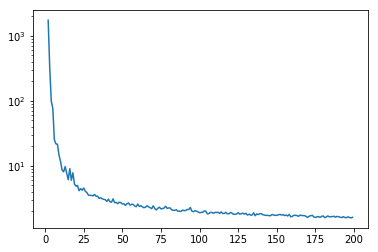

In [82]:
plt.plot(range(2,200), r_s)
plt.semilogy()

## Inner product space

**Definition:**
An inner product space is a vector space $V$ over $\mathbb{R}^{n}$ together with an *inner product*, i.e., with a map or function


$\langle \cdot , \cdot \rangle : V \times V \rightarrow \mathbb{R}$

That is, when we take two elements from $V$, the inner product is a function that maps to $\mathbb{R}$ and satisfies the following three axioms for all vectors $x,y,z \in V$ and all scalars $a \in \mathbb{R}$:


- Conjugate symmetry: $\langle x,y \rangle = \overline{\langle y,x \rangle}$
- Linearity in the first argument: $\langle ax,y \rangle = a\langle x,y \rangle\\
\langle x+y,z \rangle = \langle x,z \rangle + \langle y,z \rangle$
- Positive-definiteness: $\langle x,x \rangle \geq 0\\
\langle x,x \rangle = 0 \Leftrightarrow x = \mathbf{0}.$

## Norms and inner products

The inner product and norm can be related as
$\| x \| = \sqrt{\langle x,x \rangle}$


- **Cauchy-Schwarz inequality:** $\big|\langle x,y \rangle \big| \leq \big\|x\big\| \cdot \big\|y\big\|$ for $x, y, \in V$ with equality if and only if $x$ and $y$ are linearly independent. 

- **Angle:** $\mathrm{angle}\left(x,y\right) = \arccos \frac{\langle x,y \rangle}{\|x\| \cdot \|y\|}.$ We assume the value of the angle is chosen to be in the interval [$0,\pi$]. This is in analogy to the situation in two-dimensional Euclidean space.

- **Orthogonality:** We will say that non-zero vectors $x$ and $y$ of $V$ are orthogonal if and only if their inner product is zero.
- **Homogeneity:** $\|c \cdot x\| = |c| \cdot \|x\|$ for $x \in V$ and $c \in \mathbb{R}$ 



- **Triangle inequality:** $\|x+y\| \leq \|x\| + \|y\|.$ for $x,y$ elements of $v$




## "Deep" linear machine

[[ 1.16250551 -1.37885871]
 [-0.92399568 -1.29751339]]
[[ 1.5980499   1.70372182]
 [-1.58951989 -0.37724652]]


Text(0.5,1,'The output of the linear machine for depth 1000')

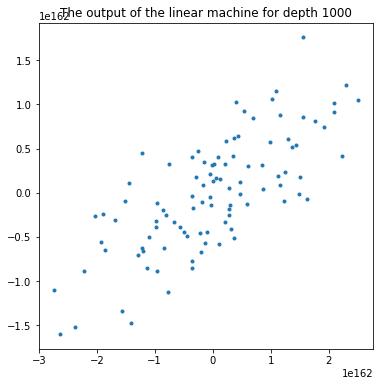

In [115]:
np.random.seed(11)

def linear_machine(input_dim, output_dim = 2, N = 100, depth = 2, input_data = None): 
    x = np.random.randn(input_dim,N)
    B = np.random.randn(input_dim,input_dim)
    A = np.random.randn(output_dim,input_dim)
    print(A)
    print(B)

    if depth > 0:
        z = np.dot(B,x)
        for i in range(depth-1):
            z = np.dot(B,z)
        y = np.dot(A,z)
    else:
        y = np.dot(A,x)

    return y.T


plt.figure(figsize=(6, 6))

num_layers = 1000
y = linear_machine(input_dim = 2, depth = num_layers)
plt.plot(y[:,0], y[:,1], '.')
plt.title("The output of the linear machine for depth " + str(num_layers))


# Singular Value Decomposition

**Theorem**: Any matrix $M \in \mathbb{R}^{m\times n}$ can be written as:

$\qquad\qquad\qquad\qquad M = U \Sigma V^{T}$ 

where $U$ and $V$ are *orthnonormal matrices* and $\Sigma$ is a *diagonal* matrix.



We can think of a matrix $M$ as a linear machine that transforms data from $x \in \mathbb{R}^{n}$ to $y \in \mathbb{R}^{m}$ as a process of going through three transformations:

1. $x$ is projected (or "expressed") by the basis set contained in $V$
2. The projection is the scaled by the elemnets in the diagnoal matrix $Sigma$
3. 

In [ ]:
display(HTML('''<img src="./imgs/lecture-1/svd.png" alt="Drawing" style="width: 400px;"/ align="left">'''))

In [110]:
np.random.seed(11)
A = np.random.randn(2,2)
print(A)
B = np.random.randn(2,2)
print(B)

[[ 1.74945474 -0.286073  ]
 [-0.48456513 -2.65331856]]
[[-0.00828463 -0.31963136]
 [-0.53662936  0.31540267]]


In [132]:
U, s, V = np.linalg.svd(A)
print(s.shape)
print(s)
np.diag(s)

(2,)
[2.69755537 1.77215333]


array([[2.69755537, 0.        ],
       [0.        , 1.77215333]])

In [112]:
U

array([[-0.02144498,  0.99977003],
       [ 0.99977003,  0.02144498]])

In [113]:
V

array([[-0.19349768, -0.98110073],
       [ 0.98110073, -0.19349768]])

In [116]:
np.dot(U, np.dot(np.diag(s),V))

array([[ 1.74945474, -0.286073  ],
       [-0.48456513, -2.65331856]])

(-1, 1)

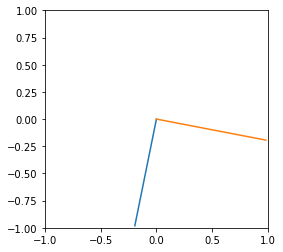

In [127]:
width = 4
height = 4
plt.figure(figsize=(width, height))
plt.plot([0, V[0,0]], [0,V[0,1]])
plt.plot([0,V[1,0]], [0,V[1,1]])
plt.xlim([-1,1])
plt.ylim([-1,1])

1.772153331689385


(-4, 4)

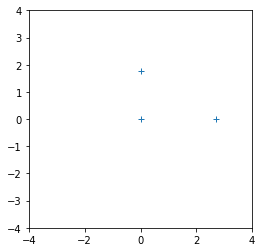

In [140]:
width = 4
height = 4
print(s[1])
plt.figure(figsize=(width, height))
#plt.plot([0, s[0]], [0, 0])
#plt.plot([0, 0], [0, s[1]])
plt.plot([0,0, s[0]], [0, s[1], 0],"+")
plt.xlim([-4,4])
plt.ylim([-4,4])

(-1, 1)

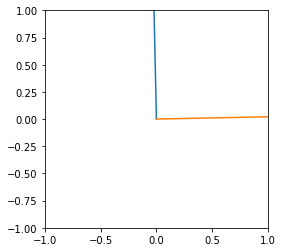

In [128]:
width = 4
height = 4
plt.figure(figsize=(width, height))
plt.plot([0, U[0,0]], [0,U[0,1]])
plt.plot([0,U[1,0]], [0,U[1,1]])
plt.xlim([-1,1])
plt.ylim([-1,1])

In [141]:
## Real world data

In [142]:
import pandas as pd

In [143]:
df = pd.read_csv("./data/trian-har.csv")

data/trian-har.csv

IOError: ignored

In [144]:
df.head()

NameError: ignored

In [ ]:
df_subject = df[df.subject == 1]

In [ ]:
data = np.array(df_subject.iloc[:,:-2])

In [ ]:
U, s, V = np.linalg.svd(data)

[]

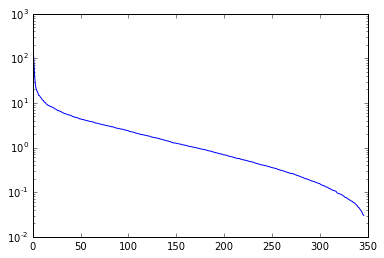

In [ ]:
plt.plot(s)
plt.semilogy()

In [ ]:
data.shape

(347, 561)

In [ ]:
U.shape

(347, 347)

In [ ]:
V.shape

(561, 561)

In [ ]:
data.shape

(347, 561)

In [ ]:
s[-10:]

array([ 0.05509901,  0.05235954,  0.05051615,  0.04654907,  0.04497771,
        0.04149722,  0.03911558,  0.03609977,  0.03199052,  0.03018237])

In [ ]:
s[:10]

array([ 282.15384003,   95.42353957,   36.85202834,   22.82138203,
         19.08013692,   17.70325797,   14.88130032,   14.57952211,
         13.41238157,   12.72725109])

In [ ]:
pd.unique(df_subject.Activity)

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
data_projected = np.dot(V, data.T).T

In [ ]:
pd.unique(df_subject.Activity)

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

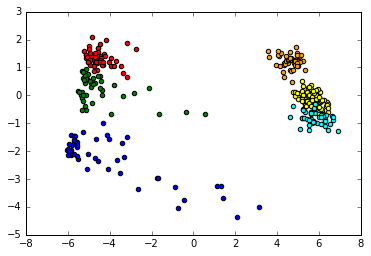

In [ ]:
activity_codes = {
    "STANDING": "red", "SITTING": "green", "LAYING": "blue", "WALKING": "yellow",
    'WALKING_DOWNSTAIRS': "cyan", 'WALKING_UPSTAIRS': "orange" }

for i in range(data_projected.shape[0]):
    ax = plt.scatter(data_projected[i,1], data_projected[i,3], c = activity_codes[df_subject.Activity[i]])
    

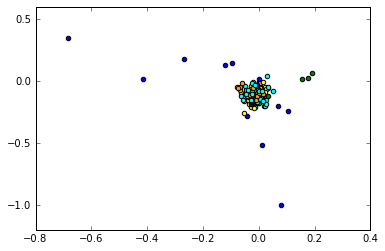

In [ ]:
for i in range(data_projected.shape[0]):
    ax = plt.scatter(data[i,1], data[i,2], c = activity_codes[df_subject.Activity[i]])



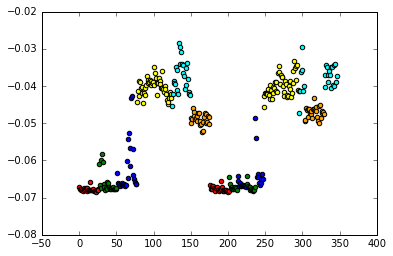

In [ ]:
for i in range(data_projected.shape[0]):
    plt.scatter(i, U[i,0], c = activity_codes[df_subject.Activity[i]])
